<a href="https://colab.research.google.com/github/OWL-408/-1/blob/main/202409Prophet%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from google.colab import drive
import matplotlib.pyplot as plt

# Googleドライブをマウント（既にマウントされている場合はこの行をコメントアウトしてください）
# drive.mount('/content/drive')

# データの読み込み
df = pd.read_csv('/content/drive/MyDrive/プログラム/IF_steel_ss_true_stress_strain.csv')
#df = pd.read_csv('/content/drive/MyDrive/Excel_to_CSV/F.csv')

# Prophetのデータ形式に変換
df['ds'] = pd.to_datetime(df['time'])
df['y'] = df['True Stress']

# 最適なハイパーパラメータを設定
optimal_params = {
    'changepoint_prior_scale': 0.5,
    'seasonality_prior_scale': 10.0,
    'yearly_seasonality': False,
    'weekly_seasonality': False
}

# モデルの構築と学習（最適パラメータを使用）
m = Prophet(**optimal_params)
m.fit(df)

# 予測の実行
future = m.make_future_dataframe(periods=0)
forecast = m.predict(future)

# True StrainとTrue Stressの関係を得る関数
def get_true_strain(time, df):
    return np.interp(time, df['ds'].astype(int).values, df['True Strain'])

# 予測結果にTrue Strainを追加
forecast['True Strain'] = forecast['ds'].astype(int).apply(lambda x: get_true_strain(x, df))

# プロットの作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# 時間 vs True Stress のプロット
m.plot(forecast, ax=ax1)
ax1.set_title('Time vs True Stress')

# True Strain vs True Stress のプロット
ax2.scatter(df['True Strain'], df['True Stress'], label='実測データ', alpha=0.5)
ax2.plot(forecast['True Strain'], forecast['yhat'], color='r', label='予測')
ax2.fill_between(forecast['True Strain'], forecast['yhat_lower'], forecast['yhat_upper'], color='r', alpha=0.2)

ax2.set_xlabel('True Strain')
ax2.set_ylabel('True Stress')
ax2.set_title('True Strain vs True Stress')
ax2.legend()

plt.tight_layout()
plt.show()

print("最適パラメータ:", optimal_params)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/プログラム/IF_steel_ss_true_stress_strain.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/nv2lh_z_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/5zm1ooz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9540', 'data', 'file=/tmp/tmpy0iivzpq/nv2lh_z_.json', 'init=/tmp/tmpy0iivzpq/5zm1ooz_.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_modelk205__hp/prophet_model-20240903025808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:58:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-24-7f8b467271ea>:69: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<

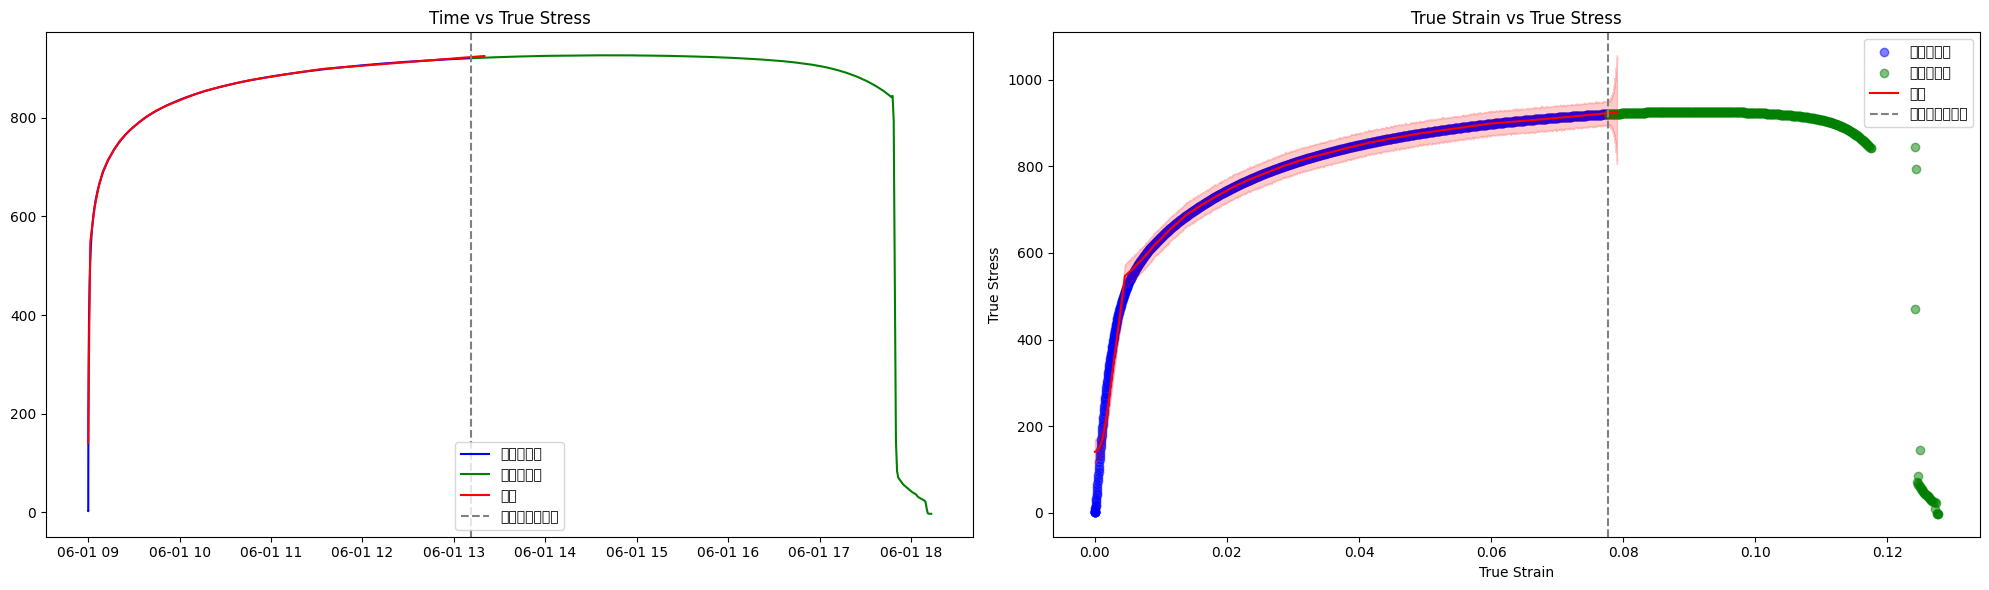

最適パラメータ: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False}


In [24]:
import pandas as pd
import numpy as np
from prophet import Prophet
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Googleドライブをマウント
drive.mount('/content/drive')

# データの読み込み
data_path = '/content/drive/MyDrive/Excel_to_CSV/B.csv'
df = pd.read_csv(data_path)

# 必要な列の選択とデータ前処理
df['ds'] = pd.to_datetime(df['time'])
df['y'] = df['True Stress']

# 学習データと検証データに分割 (例として7割を学習データ、3割を検証データに使用)
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)

# モデルの設定
optimal_params = {
    'changepoint_prior_scale': 0.5,
    'seasonality_prior_scale': 10.0,
    'yearly_seasonality': False,
    'weekly_seasonality': False,
}

# モデルの構築と学習
m = Prophet(**optimal_params)
m.fit(train_df)

# 予測の実行
future = m.make_future_dataframe(periods=len(test_df), freq='S')
forecast = m.predict(future)

# True StrainとTrue Stressの関係を得る関数
def get_true_strain(time, df):
    return np.interp(time, df['ds'].astype(int).values, df['True Strain'])

# 予測結果にTrue Strainを追加
forecast['True Strain'] = forecast['ds'].astype(int).apply(lambda x: get_true_strain(x, df))

# プロットの作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# 時間 vs True Stress のプロット
ax1.plot(train_df['ds'], train_df['y'], 'b-', label='学習データ')
ax1.plot(test_df['ds'], test_df['y'], 'g-', label='検証データ')
ax1.plot(forecast['ds'], forecast['yhat'], 'r-', label='予測')
ax1.axvline(x=train_df['ds'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')

ax1.set_title('Time vs True Stress')
ax1.legend()

# True Strain vs True Stress のプロット
ax2.scatter(train_df['True Strain'], train_df['True Stress'], color='b', label='学習データ', alpha=0.5)
ax2.scatter(test_df['True Strain'], test_df['True Stress'], color='g', label='検証データ', alpha=0.5)
ax2.plot(forecast['True Strain'], forecast['yhat'], color='r', label='予測')
ax2.fill_between(forecast['True Strain'], forecast['yhat_lower'], forecast['yhat_upper'], color='r', alpha=0.2)

ax2.set_xlabel('True Strain')
ax2.set_ylabel('True Stress')
ax2.set_title('True Strain vs True Stress')
ax2.axvline(x=train_df['True Strain'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')
ax2.legend()

plt.tight_layout()
plt.show()

print("最適パラメータ:", optimal_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/dzochx51.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/girhqh4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55335', 'data', 'file=/tmp/tmpy0iivzpq/dzochx51.json', 'init=/tmp/tmpy0iivzpq/girhqh4x.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_modelsuq3onsz/prophet_model-20240903025820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


02:58:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-25-6df027602d27>:68: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-25-6df027602d27>:68: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-25-6df027602d27>:68: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-25-6df027602d27>:68: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-25-6df027602d27>:68: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-25-6df027602d27>:68: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-25-6df027602d27>:68: UserWarning: Glyph 

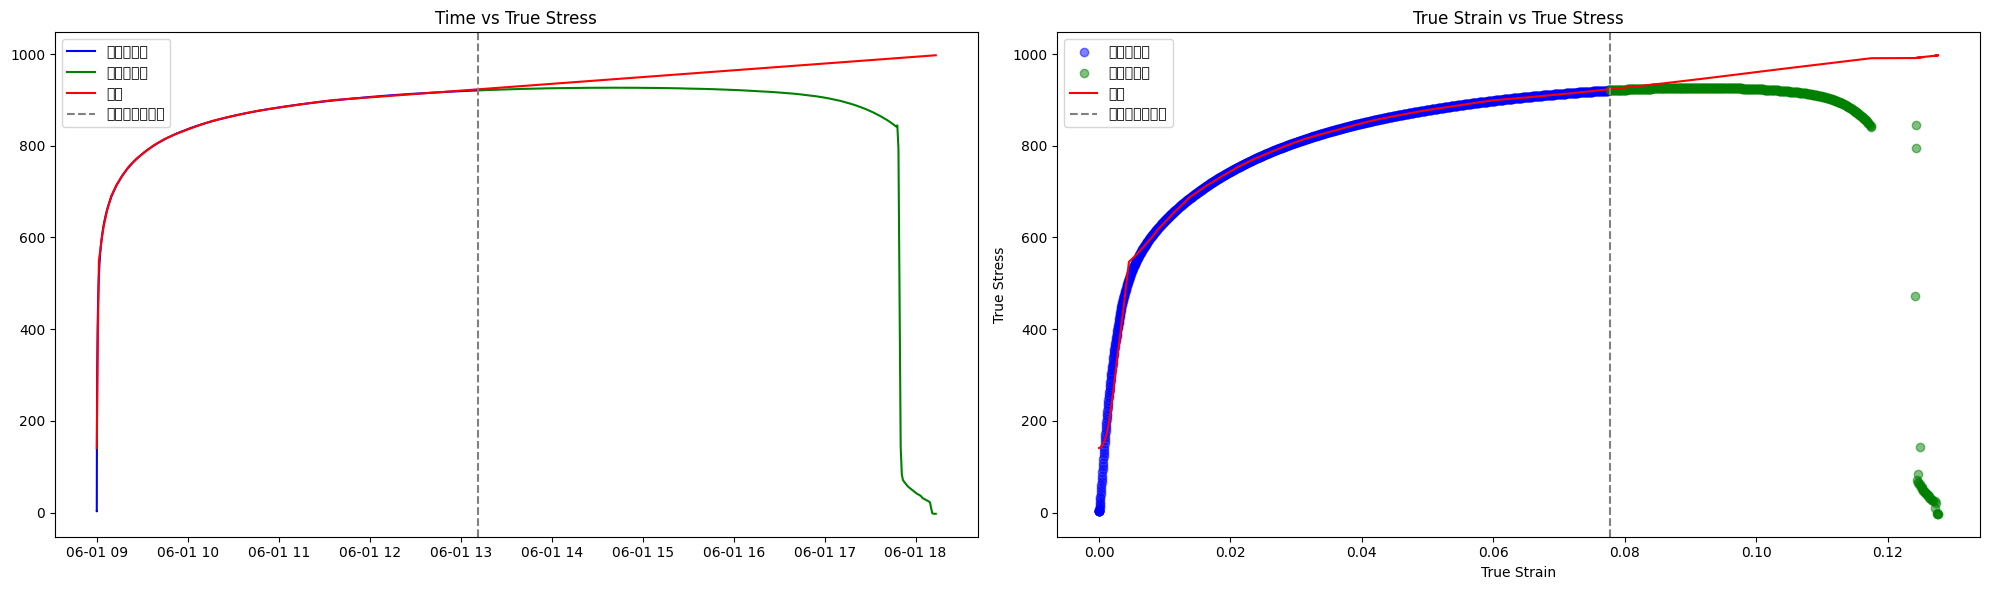

最適パラメータ: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False}


In [25]:
import pandas as pd
import numpy as np
from prophet import Prophet
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Googleドライブをマウント
drive.mount('/content/drive')

# データの読み込み
data_path = '/content/drive/MyDrive/Excel_to_CSV/B.csv'
df = pd.read_csv(data_path)

# 必要な列の選択とデータ前処理
df['ds'] = pd.to_datetime(df['time'])
df['y'] = df['True Stress']

# 学習データと検証データに分割 (7割を学習データ、3割を検証データに使用)
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)

# モデルの設定
optimal_params = {
    'changepoint_prior_scale': 0.5,
    'seasonality_prior_scale': 10.0,
    'yearly_seasonality': False,
    'weekly_seasonality': False,
}

# モデルの構築と学習
m = Prophet(**optimal_params)
m.fit(train_df)

# 予測の実行
future = pd.concat([train_df[['ds']], test_df[['ds']]])
forecast = m.predict(future)

# True StrainとTrue Stressの関係を得る関数
def get_true_strain(time, df):
    return np.interp(time, df['ds'].astype(int).values, df['True Strain'])

# 予測結果にTrue Strainを追加
forecast['True Strain'] = forecast['ds'].astype(int).apply(lambda x: get_true_strain(x, df))

# プロットの作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# 時間 vs True Stress のプロット
ax1.plot(train_df['ds'], train_df['y'], 'b-', label='学習データ')
ax1.plot(test_df['ds'], test_df['y'], 'g-', label='検証データ')
ax1.plot(forecast['ds'], forecast['yhat'], 'r-', label='予測')
ax1.axvline(x=train_df['ds'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')

ax1.set_title('Time vs True Stress')
ax1.legend()

# True Strain vs True Stress のプロット
ax2.scatter(train_df['True Strain'], train_df['True Stress'], color='b', label='学習データ', alpha=0.5)
ax2.scatter(test_df['True Strain'], test_df['True Stress'], color='g', label='検証データ', alpha=0.5)
ax2.plot(forecast['True Strain'], forecast['yhat'], color='r', label='予測')

ax2.set_xlabel('True Strain')
ax2.set_ylabel('True Stress')
ax2.set_title('True Strain vs True Stress')
ax2.axvline(x=train_df['True Strain'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')
ax2.legend()

plt.tight_layout()
plt.show()

print("最適パラメータ:", optimal_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/b3scud0w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/baqmv6jw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16958', 'data', 'file=/tmp/tmpy0iivzpq/b3scud0w.json', 'init=/tmp/tmpy0iivzpq/baqmv6jw.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_modelcqislkoh/prophet_model-20240903025832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


02:58:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 

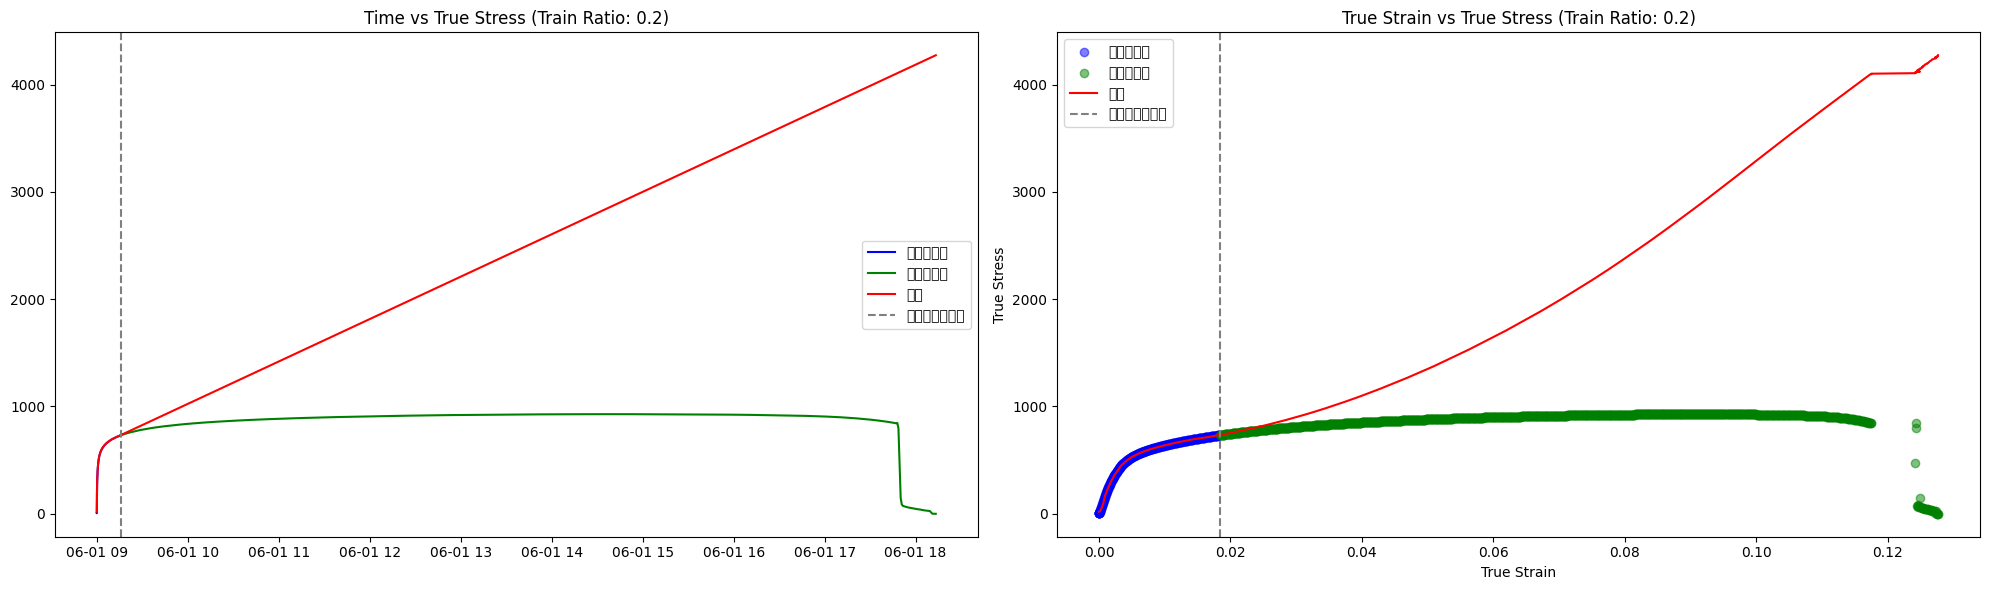

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/s4hyntyu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/4de3ep42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15946', 'data', 'file=/tmp/tmpy0iivzpq/s4hyntyu.json', 'init=/tmp/tmpy0iivzpq/4de3ep42.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_modelaav8a_az/prophet_model-20240903025834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Train Ratio: 0.2
MAE: 1181.8172
RMSE: 1577.1543
---


02:58:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 

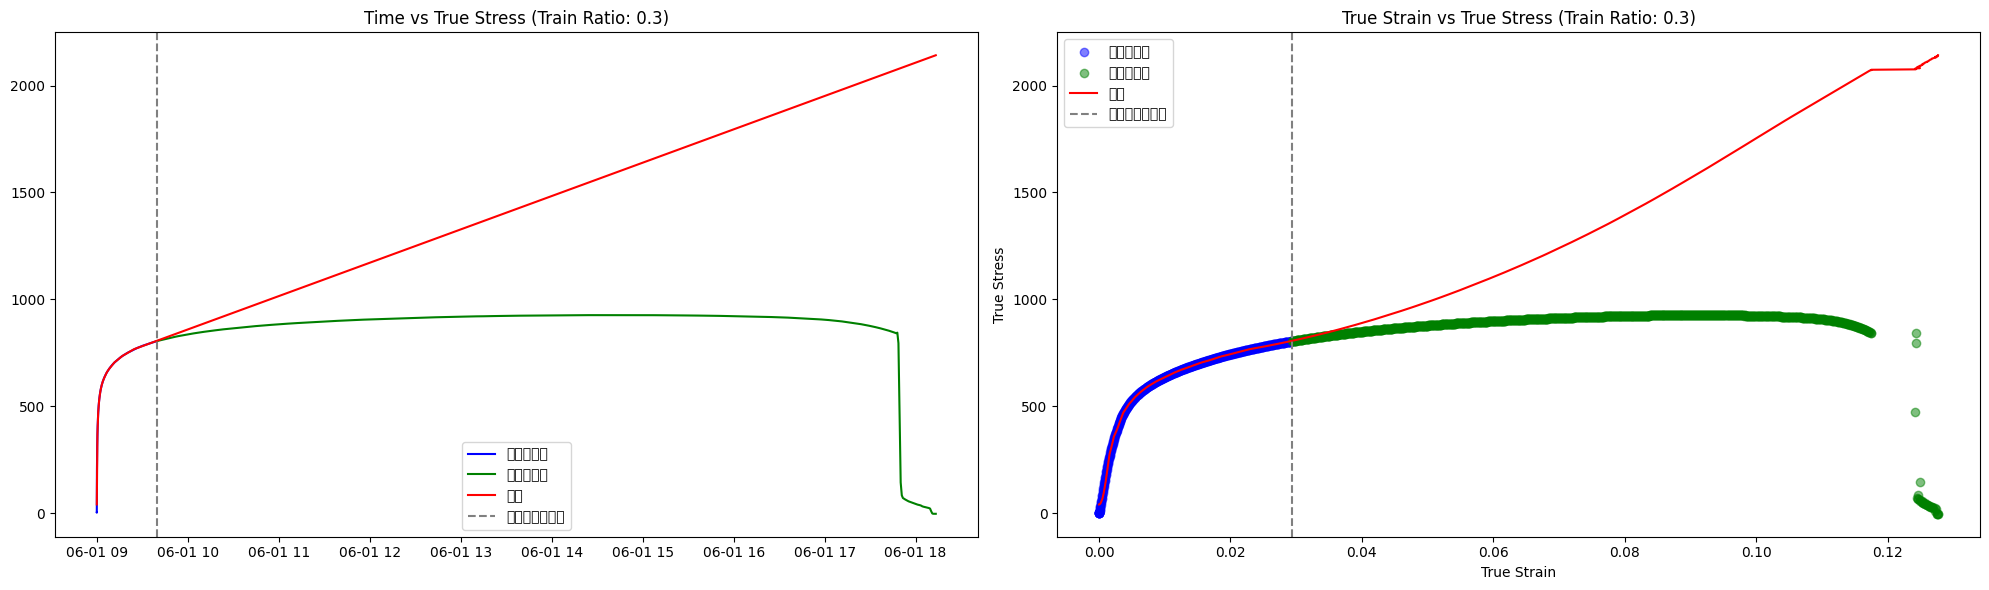

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/6ius95s_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/_mcjfp8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59864', 'data', 'file=/tmp/tmpy0iivzpq/6ius95s_.json', 'init=/tmp/tmpy0iivzpq/_mcjfp8b.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_model3op2db1j/prophet_model-20240903025836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Train Ratio: 0.3
MAE: 459.5513
RMSE: 632.5640
---


02:58:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 

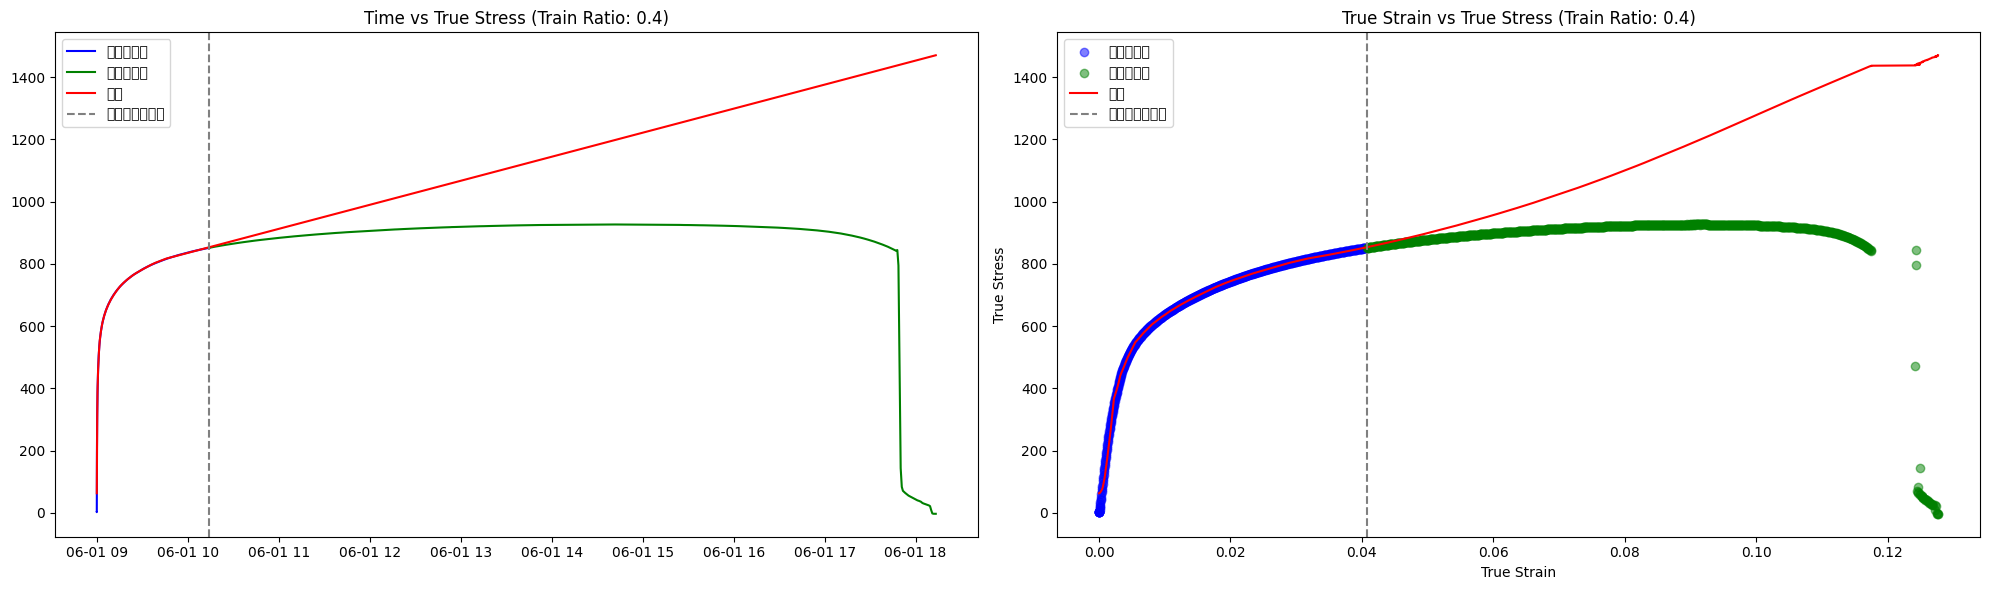

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/0b7kps5f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/06ivgvcz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2432', 'data', 'file=/tmp/tmpy0iivzpq/0b7kps5f.json', 'init=/tmp/tmpy0iivzpq/06ivgvcz.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_modelgz3y8pl2/prophet_model-20240903025840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Train Ratio: 0.4
MAE: 230.6769
RMSE: 350.4313
---


02:58:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 

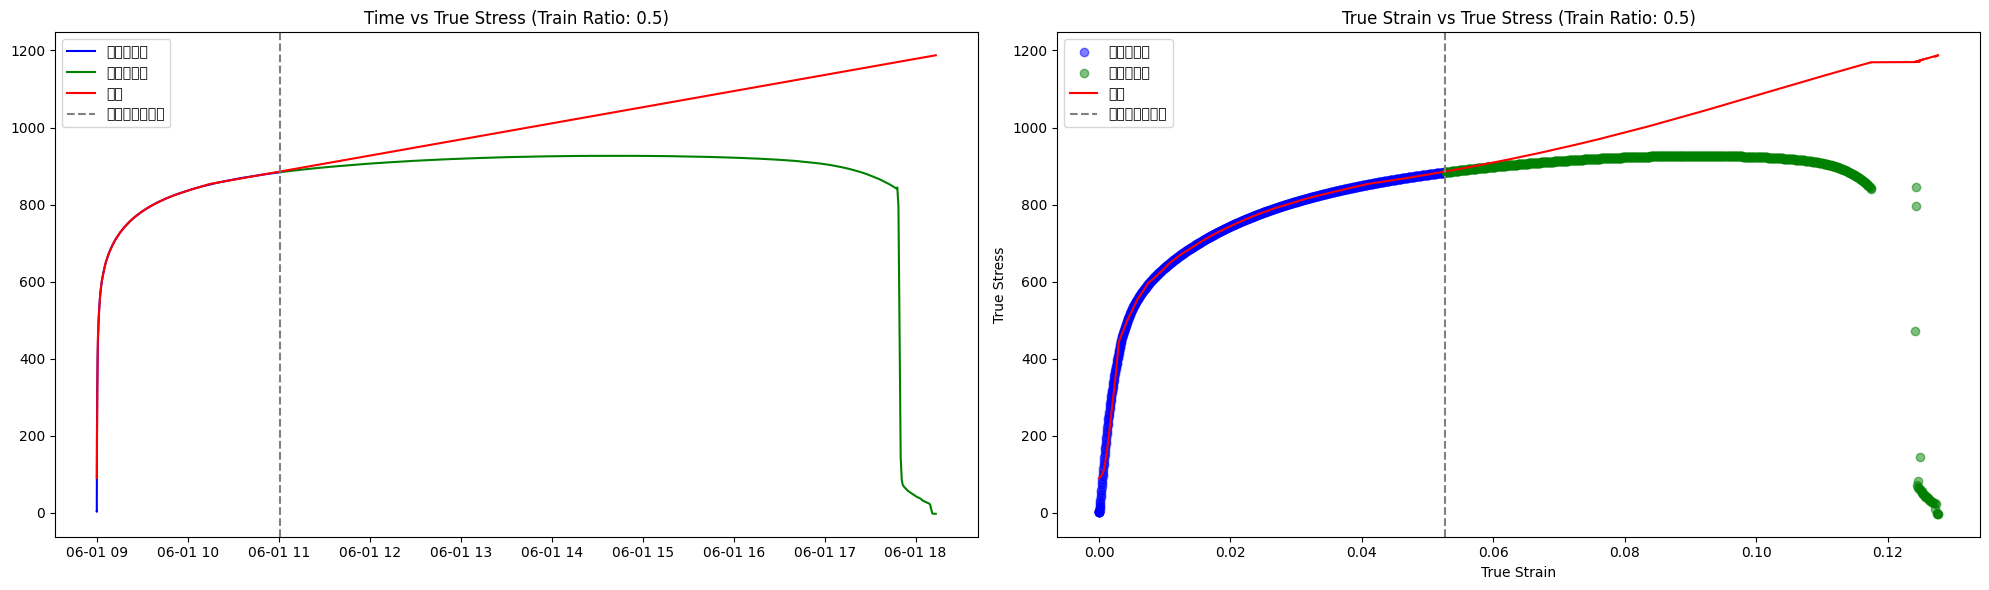

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/90_tgrhz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/4tp8bt2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64583', 'data', 'file=/tmp/tmpy0iivzpq/90_tgrhz.json', 'init=/tmp/tmpy0iivzpq/4tp8bt2t.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_model6ky5us35/prophet_model-20240903025843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Train Ratio: 0.5
MAE: 136.6354
RMSE: 252.7393
---


02:58:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 

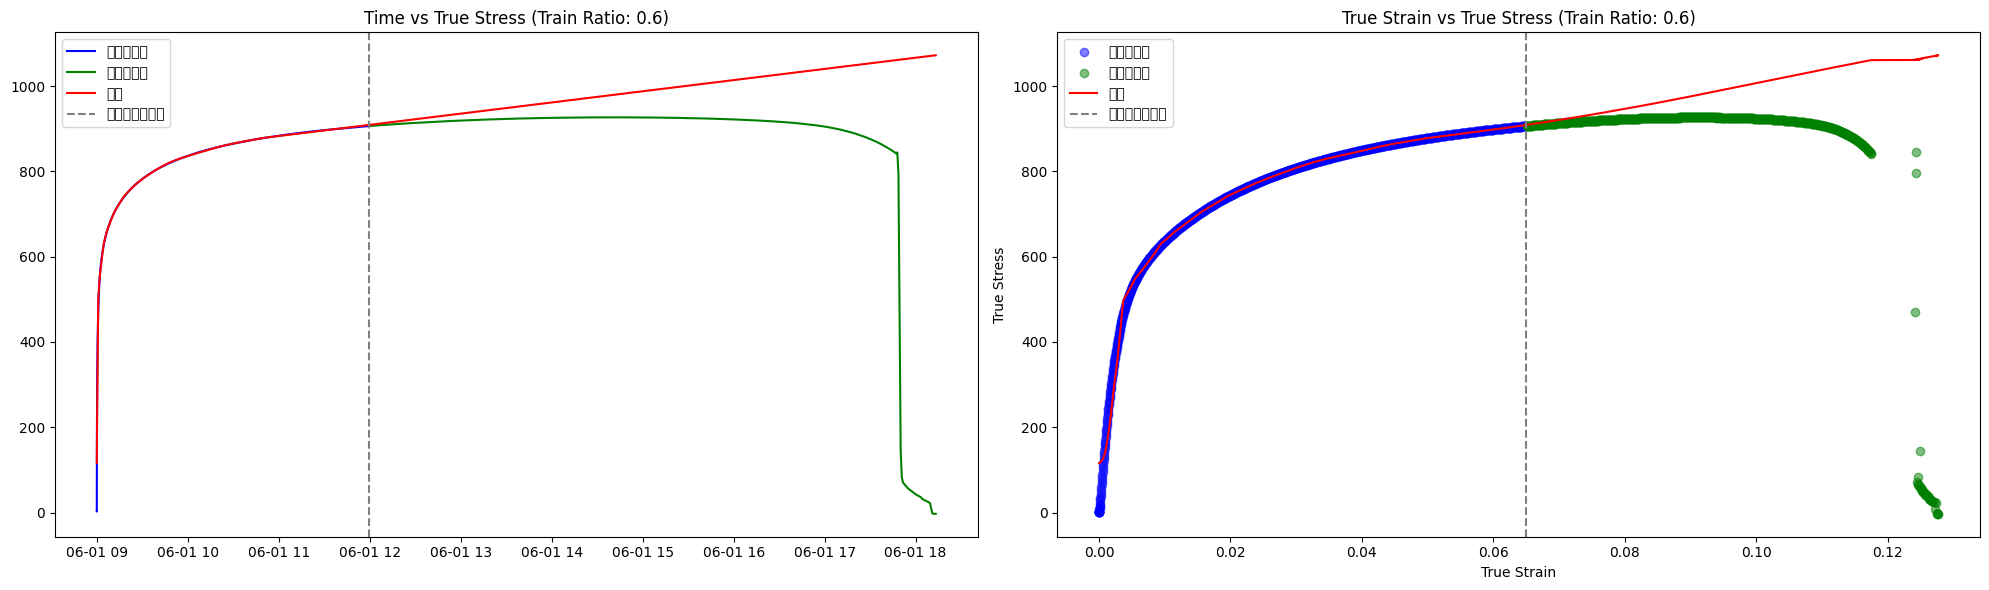

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/henubxh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/_4xq8kd4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99708', 'data', 'file=/tmp/tmpy0iivzpq/henubxh6.json', 'init=/tmp/tmpy0iivzpq/_4xq8kd4.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_modelhklo_4o_/prophet_model-20240903025846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Train Ratio: 0.6
MAE: 106.7093
RMSE: 234.3936
---


02:58:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 

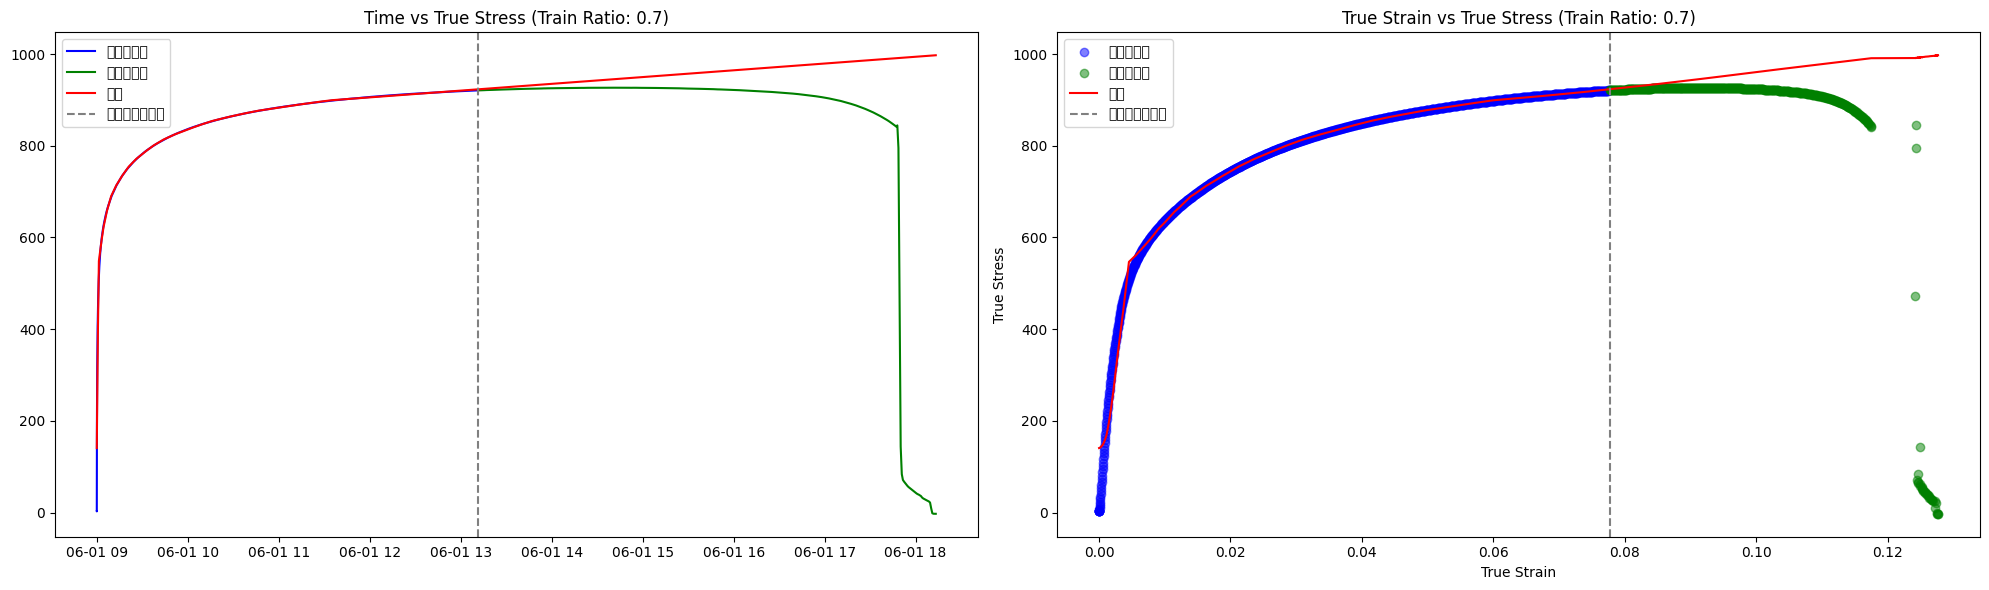

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/2f77juzf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/bxju7v7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20371', 'data', 'file=/tmp/tmpy0iivzpq/2f77juzf.json', 'init=/tmp/tmpy0iivzpq/bxju7v7u.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_modelmiuc7psc/prophet_model-20240903025850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Train Ratio: 0.7
MAE: 95.2716
RMSE: 241.8926
---


02:58:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 

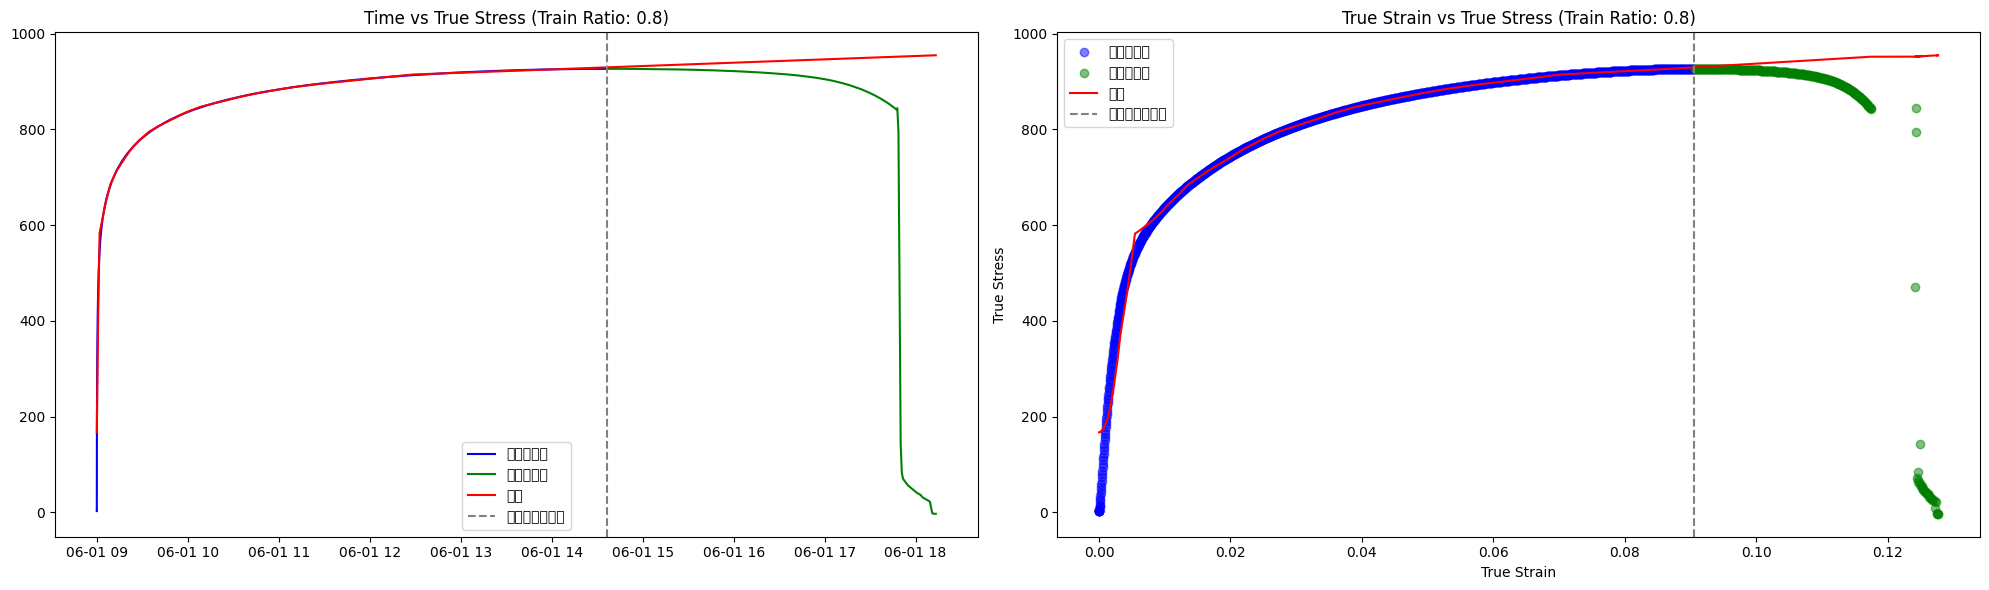

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/cwm3o6uk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/iyrubaj2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32677', 'data', 'file=/tmp/tmpy0iivzpq/cwm3o6uk.json', 'init=/tmp/tmpy0iivzpq/iyrubaj2.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_model0rjx2tp5/prophet_model-20240903025854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Train Ratio: 0.8
MAE: 110.7803
RMSE: 279.7387
---


02:58:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-26-5b1bd5948b41>:88: UserWarning: Glyph 

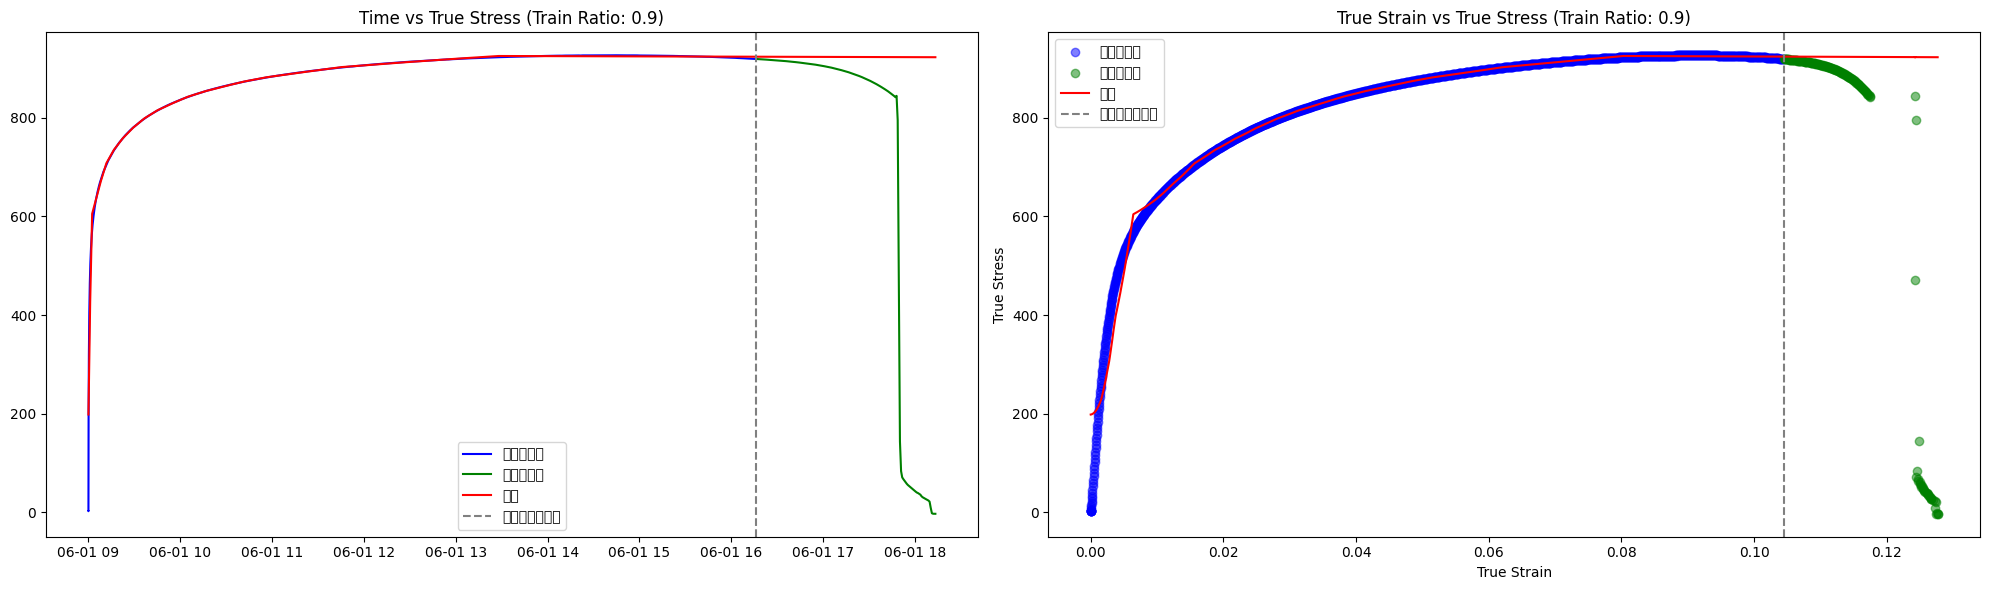

Train Ratio: 0.9
MAE: 186.0970
RMSE: 380.1766
---
   Train Ratio          MAE         RMSE
0          0.2  1181.817248  1577.154348
1          0.3   459.551339   632.564038
2          0.4   230.676864   350.431347
3          0.5   136.635418   252.739278
4          0.6   106.709338   234.393644
5          0.7    95.271633   241.892551
6          0.8   110.780257   279.738664
7          0.9   186.097042   380.176623


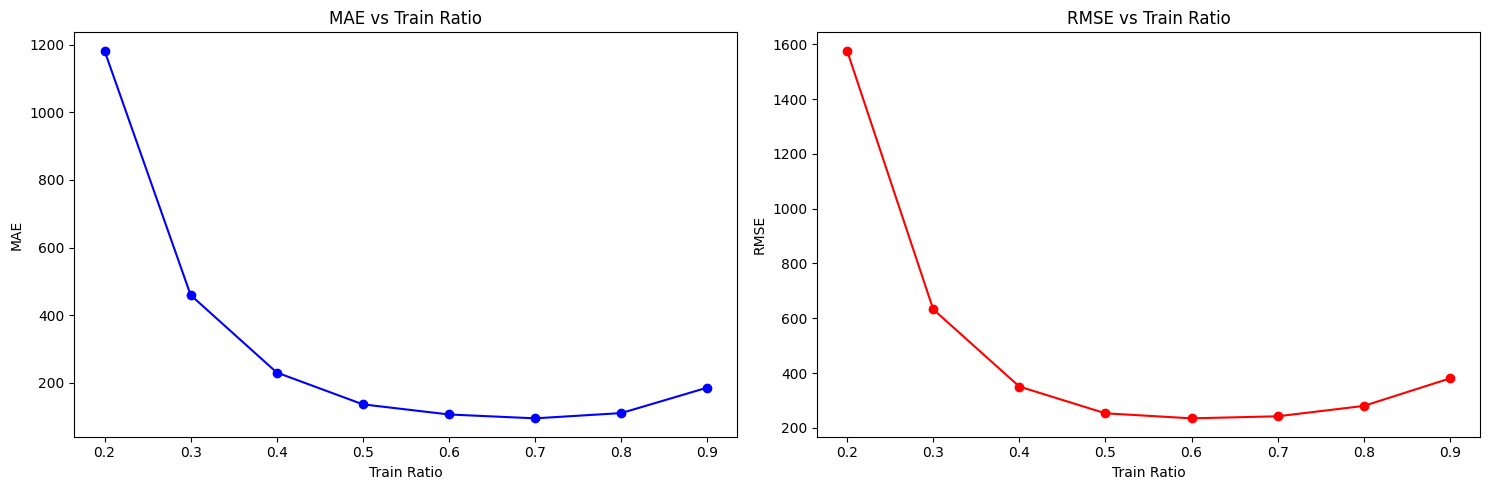

最適パラメータ: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False}


In [26]:
import pandas as pd
import numpy as np
from prophet import Prophet
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Googleドライブをマウント
drive.mount('/content/drive')

# データの読み込み
data_path = '/content/drive/MyDrive/Excel_to_CSV/B.csv'
df = pd.read_csv(data_path)

# 必要な列の選択とデータ前処理
df['ds'] = pd.to_datetime(df['time'])
df['y'] = df['True Stress']

# モデルの設定
optimal_params = {
    'changepoint_prior_scale': 0.5,
    'seasonality_prior_scale': 10.0,
    'yearly_seasonality': False,
    'weekly_seasonality': False,
}

# 学習データの割合のリスト
train_ratios = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

results = []

for train_ratio in train_ratios:
    # 学習データと検証データに分割
    train_df, test_df = train_test_split(df, test_size=1-train_ratio, shuffle=False)

    # モデルの構築と学習
    m = Prophet(**optimal_params)
    m.fit(train_df)

    # 予測の実行
    future = pd.concat([train_df[['ds']], test_df[['ds']]])
    forecast = m.predict(future)

    # True StrainとTrue Stressの関係を得る関数
    def get_true_strain(time, df):
        return np.interp(time, df['ds'].astype(int).values, df['True Strain'])

    # 予測結果にTrue Strainを追加
    forecast['True Strain'] = forecast['ds'].astype(int).apply(lambda x: get_true_strain(x, df))

    # 評価指標の計算
    mae = mean_absolute_error(test_df['y'], forecast.loc[forecast['ds'].isin(test_df['ds']), 'yhat'])
    rmse = np.sqrt(mean_squared_error(test_df['y'], forecast.loc[forecast['ds'].isin(test_df['ds']), 'yhat']))

    results.append({
        'train_ratio': train_ratio,
        'mae': mae,
        'rmse': rmse,
        'train_df': train_df,
        'test_df': test_df,
        'forecast': forecast
    })

    # プロットの作成
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # 時間 vs True Stress のプロット
    ax1.plot(train_df['ds'], train_df['y'], 'b-', label='学習データ')
    ax1.plot(test_df['ds'], test_df['y'], 'g-', label='検証データ')
    ax1.plot(forecast['ds'], forecast['yhat'], 'r-', label='予測')
    ax1.axvline(x=train_df['ds'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')

    ax1.set_title(f'Time vs True Stress (Train Ratio: {train_ratio:.1f})')
    ax1.legend()

    # True Strain vs True Stress のプロット
    ax2.scatter(train_df['True Strain'], train_df['True Stress'], color='b', label='学習データ', alpha=0.5)
    ax2.scatter(test_df['True Strain'], test_df['True Stress'], color='g', label='検証データ', alpha=0.5)
    ax2.plot(forecast['True Strain'], forecast['yhat'], color='r', label='予測')

    ax2.set_xlabel('True Strain')
    ax2.set_ylabel('True Stress')
    ax2.set_title(f'True Strain vs True Stress (Train Ratio: {train_ratio:.1f})')
    ax2.axvline(x=train_df['True Strain'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    print(f"Train Ratio: {train_ratio:.1f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("---")

# 結果の比較
comparison_df = pd.DataFrame([(r['train_ratio'], r['mae'], r['rmse']) for r in results],
                             columns=['Train Ratio', 'MAE', 'RMSE'])
print(comparison_df)

# MAEとRMSEのプロット
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(comparison_df['Train Ratio'], comparison_df['MAE'], 'bo-')
ax1.set_xlabel('Train Ratio')
ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Train Ratio')

ax2.plot(comparison_df['Train Ratio'], comparison_df['RMSE'], 'ro-')
ax2.set_xlabel('Train Ratio')
ax2.set_ylabel('RMSE')
ax2.set_title('RMSE vs Train Ratio')

plt.tight_layout()
plt.show()

print("最適パラメータ:", optimal_params)

以下コード説明。変化点として最大応力を予測に考慮させたもの。

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/ak5cxlro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/8pk130hf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63951', 'data', 'file=/tmp/tmpy0iivzpq/ak5cxlro.json', 'init=/tmp/tmpy0iivzpq/8pk130hf.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_modelq3b5xbhz/prophet_model-20240903044013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:40:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


04:40:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-49-27256bfa1a8c>:80: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-49-27256bfa1a8c>:80: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-49-27256bfa1a8c>:80: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-49-27256bfa1a8c>:80: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-49-27256bfa1a8c>:80: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-49-27256bfa1a8c>:80: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-49-27256bfa1a8c>:80: UserWarning: Glyph 

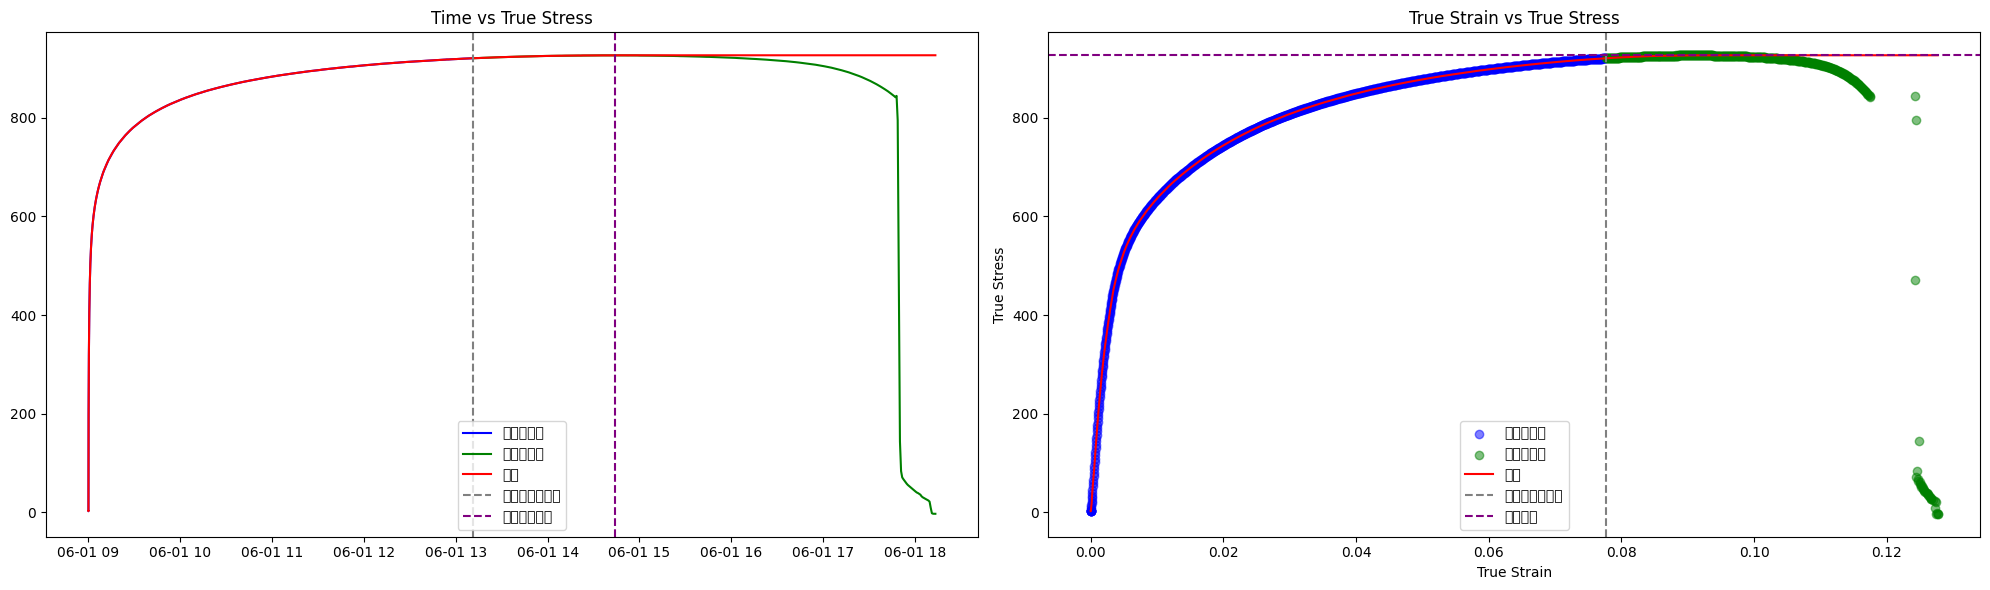

最適パラメータ: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False}


In [49]:
import pandas as pd
import numpy as np
from prophet import Prophet
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Googleドライブをマウント
drive.mount('/content/drive')

# データの読み込み
data_path = '/content/drive/MyDrive/Excel_to_CSV/B.csv'
df = pd.read_csv(data_path)

# 必要な列の選択とデータ前処理
df['ds'] = pd.to_datetime(df['time'])
df['y'] = df['True Stress']
df['True Strain'] = df['True Strain']

# 最大応力の情報を取得
max_stress = df['Tensile strength(True)'].iloc[0]
peak_time = pd.to_datetime(df['Peak Strength Time'].iloc[0])

# 最大応力のregressorを作成
df['max_stress'] = np.where(df['ds'] <= peak_time, df['y'] / max_stress, 1)

# 学習データと検証データに分割 (7割を学習データ、3割を検証データに使用)
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)

# モデルの設定
optimal_params = {
    'changepoint_prior_scale': 0.5,
    'seasonality_prior_scale': 10.0,
    'yearly_seasonality': False,
    'weekly_seasonality': False,
}

# 最大応力時点をカスタム休日として設定
peak_holiday = pd.DataFrame({
  'holiday': 'peak_stress',
  'ds': [peak_time],
  'lower_window': 0,
  'upper_window': 0,
})

# モデルの構築と学習
m = Prophet(**optimal_params, holidays=peak_holiday)
m.add_regressor('max_stress')
m.fit(train_df)

# 予測の実行
future = pd.concat([train_df[['ds', 'max_stress']], test_df[['ds', 'max_stress']]])
forecast = m.predict(future)

# プロットの作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# 時間 vs True Stress のプロット
ax1.plot(train_df['ds'], train_df['y'], 'b-', label='学習データ')
ax1.plot(test_df['ds'], test_df['y'], 'g-', label='検証データ')
ax1.plot(forecast['ds'], forecast['yhat'], 'r-', label='予測')
ax1.axvline(x=train_df['ds'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')
ax1.axvline(x=peak_time, color='purple', linestyle='--', label='最大応力時点')

ax1.set_title('Time vs True Stress')
ax1.legend()

# True Strain vs True Stress のプロット
ax2.scatter(train_df['True Strain'], train_df['y'], color='b', label='学習データ', alpha=0.5)
ax2.scatter(test_df['True Strain'], test_df['y'], color='g', label='検証データ', alpha=0.5)
ax2.plot(df['True Strain'], forecast['yhat'], color='r', label='予測')

ax2.set_xlabel('True Strain')
ax2.set_ylabel('True Stress')
ax2.set_title('True Strain vs True Stress')
ax2.axvline(x=train_df['True Strain'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')
ax2.axhline(y=max_stress, color='purple', linestyle='--', label='最大応力')
ax2.legend()

plt.tight_layout()
plt.show()

print("最適パラメータ:", optimal_params)

以下コードに対する説明。破断点をさらに加え考慮させる。

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/haee9hmh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/el13fmvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93266', 'data', 'file=/tmp/tmpy0iivzpq/haee9hmh.json', 'init=/tmp/tmpy0iivzpq/el13fmvy.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_model_v0o1zy3/prophet_model-20240903033417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:34:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


03:34:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-30-92e774b79a68>:94: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-30-92e774b79a68>:94: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-30-92e774b79a68>:94: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-30-92e774b79a68>:94: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-30-92e774b79a68>:94: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-30-92e774b79a68>:94: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-30-92e774b79a68>:94: UserWarning: Glyph 

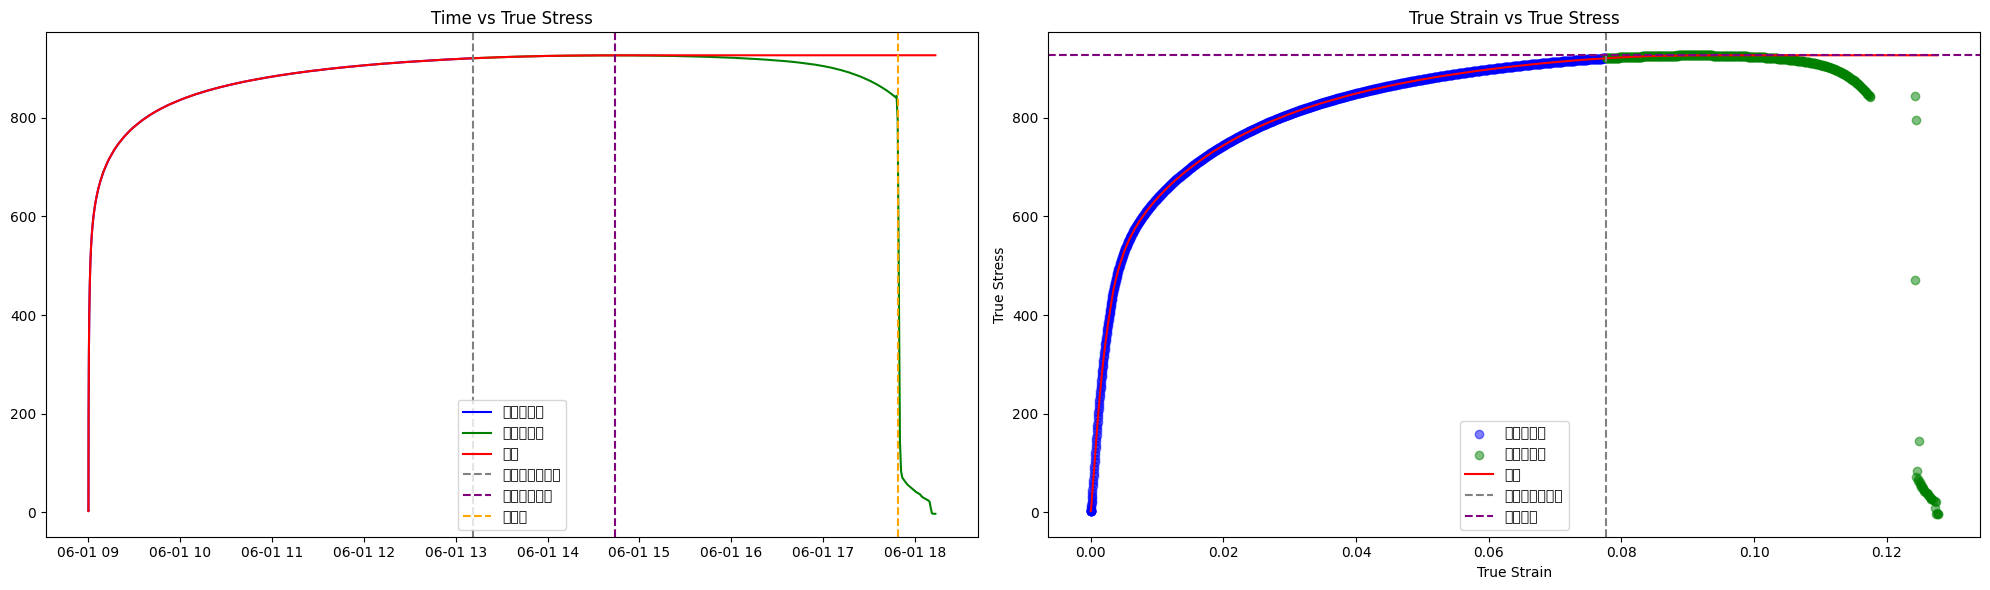

最適パラメータ: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False}


In [30]:
import pandas as pd
import numpy as np
from prophet import Prophet
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Googleドライブのマウント
drive.mount('/content/drive')

# データの読み込み
data_path = '/content/drive/MyDrive/Excel_to_CSV/B.csv'
df = pd.read_csv(data_path)

# 必要な列の選択とデータ前処理
df['ds'] = pd.to_datetime(df['time'])
df['y'] = df['True Stress']
df['True Strain'] = df['True Strain']

# 最大応力の情報を取得
max_stress = df['Tensile strength(True)'].iloc[0]
peak_time = pd.to_datetime(df['Peak Strength Time'].iloc[0])

# 最大応力のregressorを作成
df['max_stress'] = np.where(df['ds'] <= peak_time, df['y'] / max_stress, 1)

# 破断点を検出する関数の定義
def detect_fracture_point(data, strain_col='True Strain', stress_col='True Stress', threshold_multiplier=1.0):
    cleaned_data = data[[strain_col, stress_col]].dropna()
    cleaned_data['Stress Difference'] = cleaned_data[stress_col].diff()
    threshold = cleaned_data['Stress Difference'].std() * threshold_multiplier
    fracture_point_index = cleaned_data[cleaned_data['Stress Difference'].abs() > threshold].index[0]
    fracture_point_data = cleaned_data.iloc[fracture_point_index]
    return fracture_point_index, fracture_point_data

# 破断点の検出
fracture_index, fracture_data = detect_fracture_point(df)
fracture_time = df['ds'].iloc[fracture_index]

# 学習データと検証データに分割
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)

# モデルの設定
optimal_params = {
    'changepoint_prior_scale': 0.5,
    'seasonality_prior_scale': 10.0,
    'yearly_seasonality': False,
    'weekly_seasonality': False,
}

# 最大応力時点と破断点をカスタム休日として設定
holidays = pd.DataFrame({
    'holiday': ['peak_stress', 'fracture'],
    'ds': [peak_time, fracture_time],
    'lower_window': 0,
    'upper_window': 0,
})

# モデルの構築と学習
m = Prophet(**optimal_params, holidays=holidays)
m.add_regressor('max_stress')
m.fit(train_df)

# 予測の実行
future = pd.concat([train_df[['ds', 'max_stress']], test_df[['ds', 'max_stress']]])
forecast = m.predict(future)

# プロットの作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# 時間 vs True Stress のプロット
ax1.plot(train_df['ds'], train_df['y'], 'b-', label='学習データ')
ax1.plot(test_df['ds'], test_df['y'], 'g-', label='検証データ')
ax1.plot(forecast['ds'], forecast['yhat'], 'r-', label='予測')
ax1.axvline(x=train_df['ds'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')
ax1.axvline(x=peak_time, color='purple', linestyle='--', label='最大応力時点')
ax1.axvline(x=fracture_time, color='orange', linestyle='--', label='破断点')

ax1.set_title('Time vs True Stress')
ax1.legend()

# True Strain vs True Stress のプロット
ax2.scatter(train_df['True Strain'], train_df['y'], color='b', label='学習データ', alpha=0.5)
ax2.scatter(test_df['True Strain'], test_df['y'], color='g', label='検証データ', alpha=0.5)
ax2.plot(df['True Strain'], forecast['yhat'], color='r', label='予測')

ax2.set_xlabel('True Strain')
ax2.set_ylabel('True Stress')
ax2.set_title('True Strain vs True Stress')
ax2.axvline(x=train_df['True Strain'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')
ax2.axhline(y=max_stress, color='purple', linestyle='--', label='最大応力')
ax2.legend()

plt.tight_layout()
plt.show()

print("最適パラメータ:", optimal_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/3i2vd5yv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/ffmhtg8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35391', 'data', 'file=/tmp/tmpy0iivzpq/3i2vd5yv.json', 'init=/tmp/tmpy0iivzpq/ffmhtg8b.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_modelfezywau8/prophet_model-20240903033611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:36:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


03:36:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-32-92e774b79a68>:94: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-32-92e774b79a68>:94: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-32-92e774b79a68>:94: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-32-92e774b79a68>:94: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-32-92e774b79a68>:94: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-32-92e774b79a68>:94: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-32-92e774b79a68>:94: UserWarning: Glyph 

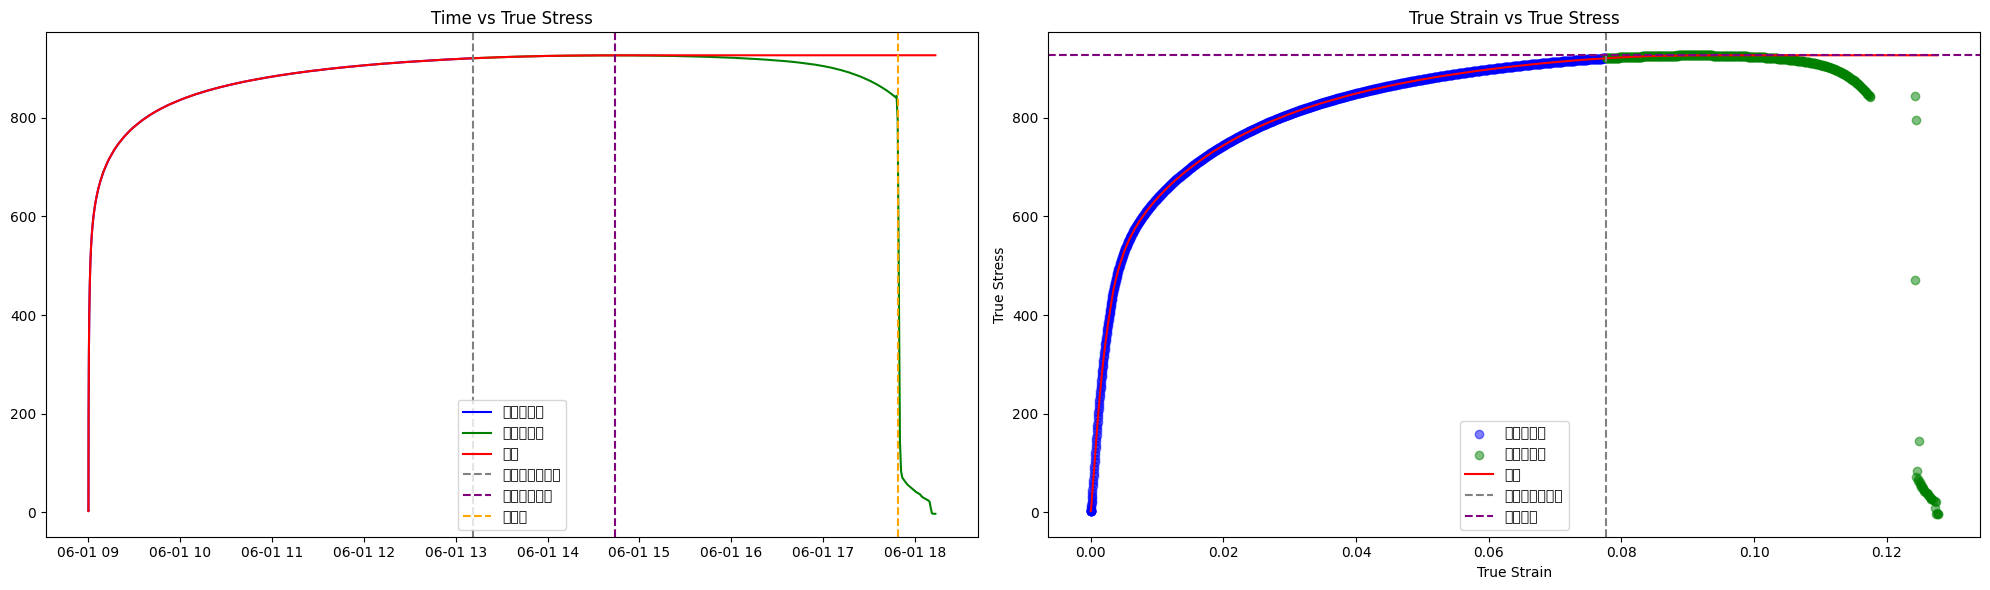

最適パラメータ: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False}


In [32]:
import pandas as pd
import numpy as np
from prophet import Prophet
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Googleドライブのマウント
drive.mount('/content/drive')

# データの読み込み
data_path = '/content/drive/MyDrive/Excel_to_CSV/B.csv'
df = pd.read_csv(data_path)

# 必要な列の選択とデータ前処理
df['ds'] = pd.to_datetime(df['time'])
df['y'] = df['True Stress']
df['True Strain'] = df['True Strain']

# 最大応力の情報を取得
max_stress = df['Tensile strength(True)'].iloc[0]
peak_time = pd.to_datetime(df['Peak Strength Time'].iloc[0])

# 最大応力のregressorを作成
df['max_stress'] = np.where(df['ds'] <= peak_time, df['y'] / max_stress, 1)

# 破断点を検出する関数の定義
def detect_fracture_point(data, strain_col='True Strain', stress_col='True Stress', threshold_multiplier=1.0):
    cleaned_data = data[[strain_col, stress_col]].dropna()
    cleaned_data['Stress Difference'] = cleaned_data[stress_col].diff()
    threshold = cleaned_data['Stress Difference'].std() * threshold_multiplier
    fracture_point_index = cleaned_data[cleaned_data['Stress Difference'].abs() > threshold].index[0]
    fracture_point_data = cleaned_data.iloc[fracture_point_index]
    return fracture_point_index, fracture_point_data

# 破断点の検出
fracture_index, fracture_data = detect_fracture_point(df)
fracture_time = df['ds'].iloc[fracture_index]

# 学習データと検証データに分割
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)

# モデルの設定
optimal_params = {
    'changepoint_prior_scale': 0.5,
    'seasonality_prior_scale': 10.0,
    'yearly_seasonality': False,
    'weekly_seasonality': False,
}

# 最大応力時点と破断点をカスタム休日として設定
holidays = pd.DataFrame({
    'holiday': ['peak_stress', 'fracture'],
    'ds': [peak_time, fracture_time],
    'lower_window': 0,
    'upper_window': 0,
})

# モデルの構築と学習
m = Prophet(**optimal_params, holidays=holidays)
m.add_regressor('max_stress')
m.fit(train_df)

# 予測の実行
future = pd.concat([train_df[['ds', 'max_stress']], test_df[['ds', 'max_stress']]])
forecast = m.predict(future)

# プロットの作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# 時間 vs True Stress のプロット
ax1.plot(train_df['ds'], train_df['y'], 'b-', label='学習データ')
ax1.plot(test_df['ds'], test_df['y'], 'g-', label='検証データ')
ax1.plot(forecast['ds'], forecast['yhat'], 'r-', label='予測')
ax1.axvline(x=train_df['ds'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')
ax1.axvline(x=peak_time, color='purple', linestyle='--', label='最大応力時点')
ax1.axvline(x=fracture_time, color='orange', linestyle='--', label='破断点')

ax1.set_title('Time vs True Stress')
ax1.legend()

# True Strain vs True Stress のプロット
ax2.scatter(train_df['True Strain'], train_df['y'], color='b', label='学習データ', alpha=0.5)
ax2.scatter(test_df['True Strain'], test_df['y'], color='g', label='検証データ', alpha=0.5)
ax2.plot(df['True Strain'], forecast['yhat'], color='r', label='予測')

ax2.set_xlabel('True Strain')
ax2.set_ylabel('True Stress')
ax2.set_title('True Strain vs True Stress')
ax2.axvline(x=train_df['True Strain'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')
ax2.axhline(y=max_stress, color='purple', linestyle='--', label='最大応力')
ax2.legend()

plt.tight_layout()
plt.show()

print("最適パラメータ:", optimal_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/eq6b1weq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0iivzpq/mbbtp5uh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86520', 'data', 'file=/tmp/tmpy0iivzpq/eq6b1weq.json', 'init=/tmp/tmpy0iivzpq/mbbtp5uh.json', 'output', 'file=/tmp/tmpy0iivzpq/prophet_modelb3bxjsao/prophet_model-20240903033929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:39:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


03:39:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-35-b7e962c5fc3e>:104: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
<ipython-input-35-b7e962c5fc3e>:104: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  plt.tight_layout()
<ipython-input-35-b7e962c5fc3e>:104: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  plt.tight_layout()
<ipython-input-35-b7e962c5fc3e>:104: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
<ipython-input-35-b7e962c5fc3e>:104: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-35-b7e962c5fc3e>:104: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  plt.tight_layout()
<ipython-input-35-b7e962c5fc3e>:104: UserWarning:

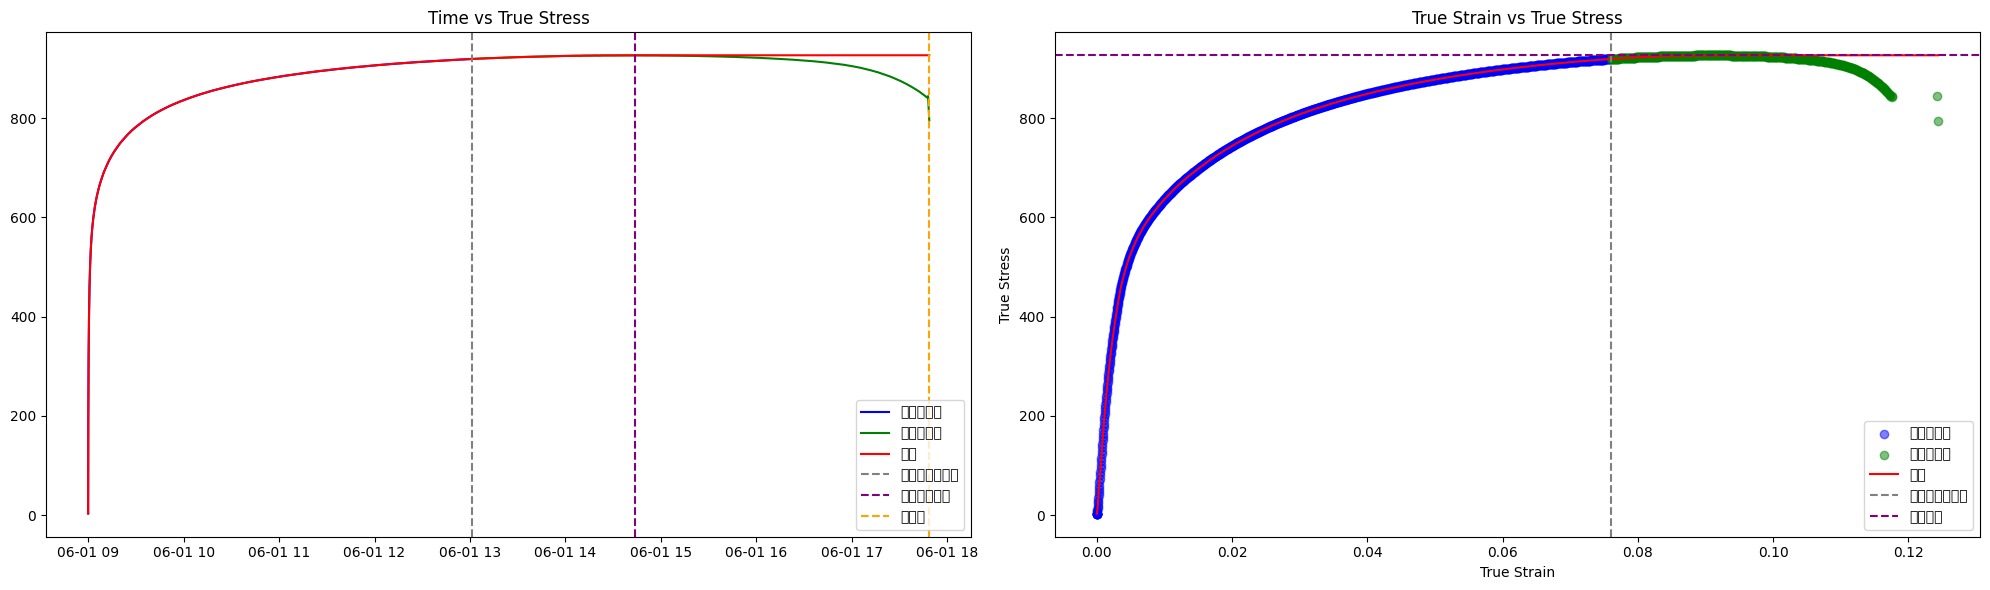

最適パラメータ: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False}


In [35]:
import pandas as pd
import numpy as np
from prophet import Prophet
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Googleドライブのマウント
drive.mount('/content/drive')

# データの読み込み
data_path = '/content/drive/MyDrive/Excel_to_CSV/B.csv'
df = pd.read_csv(data_path)

# 必要な列の選択とデータ前処理
df['ds'] = pd.to_datetime(df['time'])
df['y'] = df['True Stress']
df['True Strain'] = df['True Strain']

# 最大応力の情報を取得
max_stress = df['Tensile strength(True)'].iloc[0]
peak_time = pd.to_datetime(df['Peak Strength Time'].iloc[0])

# 破断点を検出する関数の定義
def detect_fracture_point(data, strain_col='True Strain', stress_col='True Stress', threshold_multiplier=1.0):
    cleaned_data = data[[strain_col, stress_col]].dropna()
    cleaned_data['Stress Difference'] = cleaned_data[stress_col].diff()
    threshold = cleaned_data['Stress Difference'].std() * threshold_multiplier
    fracture_point_index = cleaned_data[cleaned_data['Stress Difference'].abs() > threshold].index[0]
    fracture_point_data = cleaned_data.iloc[fracture_point_index]
    return fracture_point_index, fracture_point_data

# 破断点の検出
fracture_index, fracture_data = detect_fracture_point(df)
fracture_time = df['ds'].iloc[fracture_index]

# 破断点までのデータのみを使用
df = df[df['ds'] <= fracture_time]

# 最大応力のregressorを作成
df['max_stress'] = np.where(df['ds'] <= peak_time, df['y'] / max_stress, 1)

# 最大応力点から破断点までの線形減少トレンドを追加
df['linear_decrease'] = np.where((df['ds'] > peak_time) & (df['ds'] <= fracture_time),
                                 (fracture_time - df['ds']) / (fracture_time - peak_time),
                                 0)

# 学習データと検証データに分割
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)

# モデルの設定
optimal_params = {
    'changepoint_prior_scale': 0.5,
    'seasonality_prior_scale': 10.0,
    'yearly_seasonality': False,
    'weekly_seasonality': False,
}

# 最大応力時点と破断点をカスタム休日として設定
holidays = pd.DataFrame({
    'holiday': ['peak_stress', 'fracture'],
    'ds': [peak_time, fracture_time],
    'lower_window': 0,
    'upper_window': 0,
})

# モデルの構築と学習
m = Prophet(**optimal_params, holidays=holidays)
m.add_regressor('max_stress')
m.add_regressor('linear_decrease')
m.fit(train_df)

# 予測の実行
future = pd.concat([train_df[['ds', 'max_stress', 'linear_decrease']],
                    test_df[['ds', 'max_stress', 'linear_decrease']]])
forecast = m.predict(future)

# プロットの作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# 時間 vs True Stress のプロット
ax1.plot(train_df['ds'], train_df['y'], 'b-', label='学習データ')
ax1.plot(test_df['ds'], test_df['y'], 'g-', label='検証データ')
ax1.plot(forecast['ds'], forecast['yhat'], 'r-', label='予測')
ax1.axvline(x=train_df['ds'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')
ax1.axvline(x=peak_time, color='purple', linestyle='--', label='最大応力時点')
ax1.axvline(x=fracture_time, color='orange', linestyle='--', label='破断点')

ax1.set_title('Time vs True Stress')
ax1.legend()

# True Strain vs True Stress のプロット
ax2.scatter(train_df['True Strain'], train_df['y'], color='b', label='学習データ', alpha=0.5)
ax2.scatter(test_df['True Strain'], test_df['y'], color='g', label='検証データ', alpha=0.5)
ax2.plot(df['True Strain'], forecast['yhat'], color='r', label='予測')

ax2.set_xlabel('True Strain')
ax2.set_ylabel('True Stress')
ax2.set_title('True Strain vs True Stress')
ax2.axvline(x=train_df['True Strain'].iloc[-1], color='gray', linestyle='--', label='学習・検証区間')
ax2.axhline(y=max_stress, color='purple', linestyle='--', label='最大応力')
ax2.legend()

plt.tight_layout()
plt.show()

print("最適パラメータ:", optimal_params)